In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [117]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr, zscore

from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import r2_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Banking Transactions/Banking_transactions_1.csv')
data

<ipython-input-3-1e007029c351>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Datasets/Banking Transactions/Banking_transactions_1.csv')


,BANK_TRANS_ID,TRANS_AMOUNT,TRANS_DATE,POST_DATE,CHECK_NUMBER,CATEGORY_ID,CATEGORY,IS_DELETED,BANK_ACCOUNT_ID,TRANS_TYPE_ID,TRANS_BASE_TYPE_ID,TRANS_CATEGORY_ID,DESCRIPTION,RUNNING_BALANCE
0,10000190,333.28,2009-01-03T18:30:00.000Z,2009-01-03T18:30:00.000Z,check #62257,0.0,0,0,10000680.0,113,1.0,1,ATM WITHDRAWAL - SAN FRANCISCO IPDN BANK SAN F...,5162.00
1,10000191,333.28,2009-01-03T18:30:00.000Z,2009-01-03T18:30:00.000Z,check # 62257,0.0,0,0,10000680.0,113,1.0,1,ATM WITHDRAWAL - SAN FRANCISCO IPDN BANK SAN F...,5162.00
2,10000192,333.28,2009-01-03T18:30:00.000Z,2009-01-03T18:30:00.000Z,#62257,0.0,0,0,10000680.0,113,1.0,1,ATM WITHDRAWAL - SAN FRANCISCO IPDN BANK SAN F...,5162.00
3,10000193,1234.00,2009-01-16T18:30:00.000Z,2009-01-27T18:30:00.000Z,62096,0.0,0,0,NaN,46,2.0,1,Account Maintenance Fee,5000.00
4,12179866,59.00,2010-08-31T18:30:00.000Z,NaN,998,0.0,category,0,10216470.0,2,2.0,17,352419TP HSBC LOAN 0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065783,18952415799,500.18,NaN,2022-08-06T18:30:00.000Z,NaN,0.0,NaN,0,76955244.0,0,2.0,8,SHELL OIL,2600.92
4065784,18952415800,1000.00,NaN,2022-08-05T18:30:00.000Z,NaN,0.0,NaN,0,76955244.0,0,2.0,21,Rent Paid,2197.92
4065785,18952415801,42.96,NaN,2022-08-04T18:30:00.000Z,NaN,0.0,NaN,0,76955244.0,0,2.0,22,McDonalds,11488.10
4065786,18952415802,2526.17,NaN,2022-08-01T18:30:00.000Z,NaN,0.0,NaN,0,76955244.0,0,1.0,27,VIASAT INC DIRECT DEP,10310.16


In [ ]:
data.columns

Index(['BANK_TRANS_ID', 'TRANS_AMOUNT', 'TRANS_DATE', 'POST_DATE',
       'CHECK_NUMBER', 'CATEGORY_ID', 'CATEGORY', 'IS_DELETED',
       'BANK_ACCOUNT_ID', 'TRANS_TYPE_ID', 'TRANS_BASE_TYPE_ID',
       'TRANS_CATEGORY_ID', 'DESCRIPTION', 'RUNNING_BALANCE'],
      dtype='object')

# **GIẢI THÍCH DỮ LIỆU:**

**BANK_TRANS_ID:** Mã định danh duy nhất cho mỗi giao dịch ngân hàng. Dùng để phân biệt các giao dịch khác nhau.

**TRANS_AMOUNT:** Số tiền của giao dịch. Đây có thể là số tiền được gửi hoặc rút từ tài khoản ngân hàng.

**TRANS_DATE:** Ngày mà giao dịch được thực hiện. Đây là ngày thực tế khi giao dịch diễn ra.

**POST_DATE:** Ngày mà giao dịch được ghi vào sổ sách của ngân hàng. Thường là ngày mà giao dịch xuất hiện trên bản sao kê tài khoản.

**CHECK_NUMBER:** Số hiệu của séc, nếu giao dịch liên quan đến việc sử dụng séc. Cột này có thể chứa giá trị NULL nếu giao dịch không phải là séc.

**(OUTPUT) CATEGORY_ID:** Mã định danh của danh mục giao dịch. Dùng để phân loại giao dịch vào các nhóm hoặc loại cụ thể.

**CATEGORY:** Tên của danh mục giao dịch. Đây là tên mô tả cho danh mục mà giao dịch thuộc về, chẳng hạn như "Chi tiêu cá nhân", "Tiền lương", "Tiết kiệm".

**IS_DELETED:** Cột đánh dấu xem giao dịch đã bị xóa hay chưa. Có thể chứa giá trị như TRUE hoặc FALSE.

**BANK_ACCOUNT_ID:** Mã định danh của tài khoản ngân hàng mà giao dịch liên quan đến. Dùng để xác định tài khoản cụ thể.

**TRANS_TYPE_ID:** Mã định danh của loại giao dịch. Ví dụ, "Rút tiền", "Gửi tiền", "Chuyển khoản".

**TRANS_BASE_TYPE_ID:** Mã định danh của loại cơ bản của giao dịch. Có thể liên quan đến phân loại giao dịch ở mức độ tổng quát hơn so với TRANS_TYPE_ID.

**TRANS_CATEGORY_ID:** Mã định danh của danh mục giao dịch. Tương tự như CATEGORY_ID, nhưng có thể phục vụ các mục đích phân loại khác.

**DESCRIPTION:** Mô tả chi tiết của giao dịch. Cung cấp thông tin bổ sung về giao dịch, chẳng hạn như tên người nhận, mục đích của giao dịch, hoặc ghi chú.

**RUNNING_BALANCE:** Số dư tài khoản sau khi giao dịch được thực hiện. Đây là số dư của tài khoản ngân hàng sau khi giao dịch đã được ghi nhận.

# **DATA CHECKING**

In [4]:
data.isnull().sum()

,0
BANK_TRANS_ID,0
TRANS_AMOUNT,65
TRANS_DATE,1170343
POST_DATE,2463910
CHECK_NUMBER,1798792
CATEGORY_ID,2512
CATEGORY,1262427
IS_DELETED,0
BANK_ACCOUNT_ID,37250
TRANS_TYPE_ID,0


In [5]:
#Xoá đi những columns có Null mà không thể chấp nhận được:
data = data.dropna(subset=['TRANS_AMOUNT', 'TRANS_DATE', 'CATEGORY_ID'])

***Tiến hành bù Null dựa theo các columns có liên kết vs nhau***

In [6]:
def fillna_cols(data):
  #Tính toán các giá trị Null của "TRANS_BASE_TYPE_ID" dựa trên việc tính xác suất của nhóm "TRANS_TYPE_ID"
  most_frequent_TRANS_BASE_TYPE_ID = data.groupby(["TRANS_TYPE_ID"])['TRANS_BASE_TYPE_ID'].agg(lambda x: x.value_counts().index[0])
  data['TRANS_BASE_TYPE_ID'] = data['TRANS_BASE_TYPE_ID'].fillna(data['TRANS_TYPE_ID'].map(most_frequent_TRANS_BASE_TYPE_ID))

  #Tính toán các giá trị Null của "CATEGORY" dựa trên việc tính xác suất của nhóm "TRANS_TYPE_ID"
  most_frequent_CATEGORY = data.groupby(["TRANS_TYPE_ID"])['CATEGORY'].agg(lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else None)
  data['CATEGORY'] = data['CATEGORY'].fillna(data['TRANS_TYPE_ID'].map(most_frequent_CATEGORY))

  #Tính toán các giá trị Null của "CATEGORY" dựa trên việc tính xác suất của nhóm "TRANS_TYPE_ID"
  most_frequent_POST_DATE = data.groupby(["TRANS_DATE"])['POST_DATE'].agg(lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else None)
  data['POST_DATE'] = data['POST_DATE'].fillna(data['TRANS_DATE'].map(most_frequent_POST_DATE))

  #Ở columns Check Number, các Null có nghĩa là "Không thanh toán bằng Séc", ta sẽ thay thế các giá trị Null
  #Các dòng mà không Null, ta sẽ đổi tên thành 'Sec'
  data['CHECK_NUMBER'] = data['CHECK_NUMBER'].apply(lambda x: 'Not Cheque' if pd.isna(x) else 'Cheque')

  #Đổi tên các dòng Null của Description thành No descript, không thì giữ nguyên
  data['DESCRIPTION'] = data['DESCRIPTION'].apply(lambda x: 'No descript' if pd.isna(x) else x)

  #Thay thế các giá trị Null của RUNNING_BALANCE thành giá trị trung bình của column này
  data['RUNNING_BALANCE'] = data['RUNNING_BALANCE'].fillna(data['RUNNING_BALANCE'].mean())

  return data

In [7]:
def change_time_type(data):
  #Chuyển đổi 2 columns sang dạng datetime:
  data['TRANS_DATE'] = pd.to_datetime(data['TRANS_DATE'], errors='coerce')
  data['POST_DATE'] = pd.to_datetime(data['POST_DATE'], errors='coerce')

  #Tạo thêm một columns mới tính toán thời gian trans và post:
  data['PROCESSING TIME'] = (data['POST_DATE'] - data['TRANS_DATE']).dt.days
  return data

In [ ]:
data = fillna_cols(data)
data = change_time_type(data)

In [9]:
data = data.drop(columns = ['BANK_ACCOUNT_ID', 'BANK_TRANS_ID', 'TRANS_DATE', 'POST_DATE', 'DESCRIPTION'])
data = data.dropna()

In [10]:
data[['TRANS_AMOUNT', 'RUNNING_BALANCE', 'PROCESSING TIME']].describe()

,TRANS_AMOUNT,RUNNING_BALANCE,PROCESSING TIME
count,2.687197e+06,2.687197e+06,2.687197e+06
mean,1.472141e+05,2.811367e+06,4.348668e+00
std,1.062466e+08,3.983802e+07,8.258969e+01
min,-1.000000e+08,-5.593078e+04,-2.922000e+04
25%,5.900000e+01,2.809640e+06,0.000000e+00
50%,5.900000e+01,2.809640e+06,1.000000e+00
75%,3.910000e+02,2.809640e+06,1.100000e+01
max,1.000000e+11,9.129152e+09,3.901000e+03


In [11]:
#Xóa đi một số dòng có PROCESSING TIME bị âm (vô lý):
data = data[data['PROCESSING TIME']>=0]

In [12]:
data

,TRANS_AMOUNT,CHECK_NUMBER,CATEGORY_ID,CATEGORY,IS_DELETED,TRANS_TYPE_ID,TRANS_BASE_TYPE_ID,TRANS_CATEGORY_ID,RUNNING_BALANCE,PROCESSING TIME
0,333.28,Cheque,0.0,0,0,113,1.0,1,5.162000e+03,0.0
1,333.28,Cheque,0.0,0,0,113,1.0,1,5.162000e+03,0.0
2,333.28,Cheque,0.0,0,0,113,1.0,1,5.162000e+03,0.0
3,1234.00,Cheque,0.0,0,0,46,2.0,1,5.000000e+03,11.0
4,59.00,Cheque,0.0,category,0,2,2.0,17,2.809640e+06,15.0
...,...,...,...,...,...,...,...,...,...,...
4065489,0.55,Not Cheque,0.0,Automotive Expenses,0,0,1.0,30,1.064738e+04,0.0
4065490,-1.68,Not Cheque,0.0,Automotive Expenses,0,0,2.0,37,1.063996e+04,0.0
4065491,7.00,Not Cheque,0.0,Automotive Expenses,0,0,1.0,30,1.064696e+04,0.0
4065492,-0.19,Not Cheque,0.0,Automotive Expenses,0,0,2.0,37,9.749160e+03,0.0


In [13]:
category_cols = ['CHECK_NUMBER', 'CATEGORY', 'CATEGORY_ID', 'IS_DELETED', 'TRANS_TYPE_ID', 'TRANS_BASE_TYPE_ID', 'TRANS_CATEGORY_ID']
numeric_cols = ['TRANS_AMOUNT', 'RUNNING_BALANCE', 'PROCESSING TIME']

for i in numeric_cols:
  print(f'Skew của column {i}:', data[i].skew())

Skew của column TRANS_AMOUNT: 807.7017657968446
Skew của column RUNNING_BALANCE: 222.44842878337727
Skew của column PROCESSING TIME: 49.491553826718665


In [14]:
df0 = data[data['CATEGORY_ID']==0]
df1 = data[data['CATEGORY_ID']==1]

In [15]:
#Tính toán IQR cho 3 columns trên:
for i in numeric_cols:
  #tính toán IQR thông qua Q1,
  Q1 = df0[i].quantile(0.25)
  Q3 = df0[i].quantile(0.75)
  IQR = Q3 - Q1

  # Xác định ngưỡng cho giá trị ngoại lệ
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Nếu bạn muốn loại bỏ các giá trị ngoại lệ
  df0 = df0[(df0[i] >= lower_bound) & (df0[i] <= upper_bound)]

print("Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:")
print(df0.shape)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(2060288, 10)


In [16]:
data = pd.concat([df0, df1])
data = data.sample(frac = 1)

# **ENCODING-FEAUTURES SELECTION**

In [17]:
#Mapping thủ công theo thứ tự giá trị: emp_length, home_ownership
def mapping_columns(data, columns_names = ['CATEGORY', 'CHECK_NUMBER']):
  # Các ánh xạ giá trị cho các cột khác nhau
    CATEGORY_mapping = {'category': 4, 'Automotive Expenses': 0, 'other': 4, 'Other Income': 2, 'ATM/Cash Withdrawals': 1, '0': 0, 'Interest': 2,
                        'Groceries': 0, 'Clothing/Shoes': 0, 'payment': 1, 'Healthcare/Medical': 0, 'Credit Card Payments': 1,
                        'General Merchandise': 0, 'Home Maintenance': 0, 'Expense Reimbursement': 0, 'Cable/Satellite Services': 0, 'Gifts': 4,
                        'Restaurants/Dining': 0, 'Uncategorized': 4, 'Child/Dependent Expenses': 0, 'Checks': 1, 'Charitable Giving': 4, 'Cheques': 1,
                        'Entertainment': 0, 'Service Charges/Fees': 1, 'Travel': 0, 'Education': 0, 'Personal Care': 0, 'Utilities': 0,
                        'Office Maintenance': 0, 'Electronics': 0, 'Gasoline/Fuel': 0, 'Investment Income': 2, 'Pets/Pet Care': 0, 'Taxes': 1,
                        'Postage and Shipping': 1, 'Paychecks/Salary': 2, 'Insurance': 0, 'CAD': 3, 'Business': 3, 'Telephone Services': 0,
                        'Online Services': 0, 'Services': 0, 'Loans': 1, 'Other Expenses': 4, 'Business Miscellaneous': 3, 'Other Bills': 0,
                        'Deposits': 1, 'Dues and Subscriptions': 0, 'Mortgages': 1, 'Category': 4, 'Retirement Income': 2, 'Gift to your Frnd2': 4,
                        'Advertising': 3, 'Transfers': 1, 'Wages Paid': 2, 'Sales': 3, 'credits': 1, 'Gift to your Frnd': 4, 'Consulting': 3,
                        'Printing': 3, 'Clothing': 0, 'Office Supplies': 3, 'Home Improvement': 0, 'Gift to your Frnd9': 4, 'Rent':3, 'INR': 3,
                        'Securities Trades': 1, 'Hobbies': 0, 'Dues': 3, 'Auto Car Truck': 3, 'Automotive':3, 'ATM Withdrawal': 1, 'Cable': 3,
                        'Payment': 1, 'Charitable': 4, 'ACCOUNTING FEE': 3}
    CHECK_NUMBER_mapping = {'Cheque': 1, 'Not Cheque': 0}

    # Thực hiện ánh xạ cho từng cột trong DataFrame
    mappings = {'CATEGORY': CATEGORY_mapping, 'CHECK_NUMBER': CHECK_NUMBER_mapping}

    for column in columns_names:
        if column in data.columns and column in mappings:
            data[column] = data[column].map(mappings[column])

    return data
data = mapping_columns(data)

***Chi-squared***

In [18]:
remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in category_cols:
  chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['CATEGORY_ID']))
  print(i, '---', pval)
  if pval > 0.05:
    remove_obj_cols.append(i)
  else:
    continue
print(remove_obj_cols)

CHECK_NUMBER --- 0.0
CATEGORY --- 0.0
CATEGORY_ID --- 0.0
IS_DELETED --- 0.16577193898209824
TRANS_TYPE_ID --- 0.0
TRANS_BASE_TYPE_ID --- 0.0
TRANS_CATEGORY_ID --- 0.0
['IS_DELETED']


In [19]:
data = data.drop(columns = remove_obj_cols)

***Spearman Corr***

In [20]:
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in numeric_cols:
  corr, p_value = spearmanr(data[col], data['CATEGORY_ID'])  # Tính Spearman Correlation
  correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
0,TRANS_AMOUNT,0.097547,0.0
2,PROCESSING TIME,0.086998,0.0
1,RUNNING_BALANCE,-0.999986,0.0


***Corr matrix***

In [21]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,TRANS_AMOUNT,CHECK_NUMBER,CATEGORY_ID,CATEGORY,TRANS_TYPE_ID,TRANS_BASE_TYPE_ID,TRANS_CATEGORY_ID,RUNNING_BALANCE,PROCESSING TIME
TRANS_AMOUNT,1.000000,-0.046823,0.112185,-0.036635,0.041537,-0.066222,0.037345,-0.112255,-0.018118
CHECK_NUMBER,-0.046823,1.000000,0.037576,0.370579,-0.230128,0.463544,-0.409548,-0.037576,0.325148
CATEGORY_ID,0.112185,0.037576,1.000000,-0.258688,0.180030,-0.153825,0.026399,-1.000000,0.098974
CATEGORY,-0.036635,0.370579,-0.258688,1.000000,-0.301564,0.226925,-0.197020,0.258685,0.241302
TRANS_TYPE_ID,0.041537,-0.230128,0.180030,-0.301564,1.000000,-0.420044,0.226724,-0.180030,-0.163002
TRANS_BASE_TYPE_ID,-0.066222,0.463544,-0.153825,0.226925,-0.420044,1.000000,-0.425595,0.153825,0.178014
TRANS_CATEGORY_ID,0.037345,-0.409548,0.026399,-0.197020,0.226724,-0.425595,1.000000,-0.026399,-0.102703
RUNNING_BALANCE,-0.112255,-0.037576,-1.000000,0.258685,-0.180030,0.153825,-0.026399,1.000000,-0.098972
PROCESSING TIME,-0.018118,0.325148,0.098974,0.241302,-0.163002,0.178014,-0.102703,-0.098972,1.000000


# **EDA**

***Bar plot cho các cols phân loại***

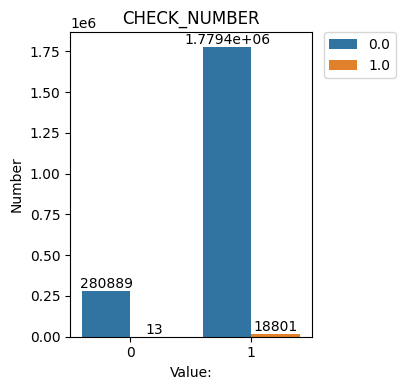

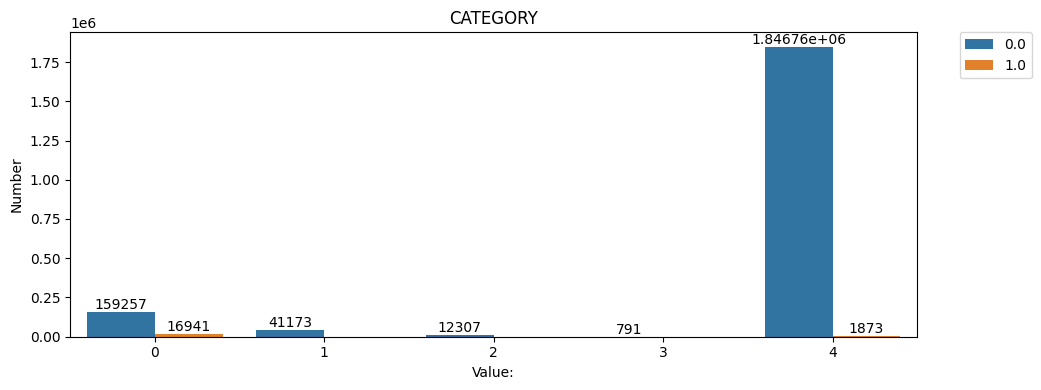

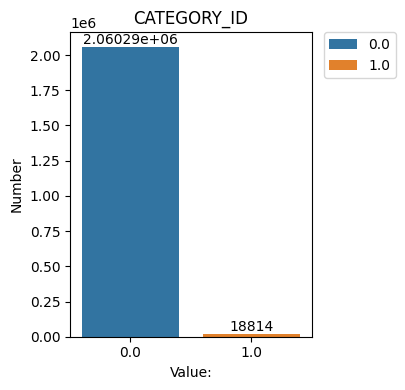

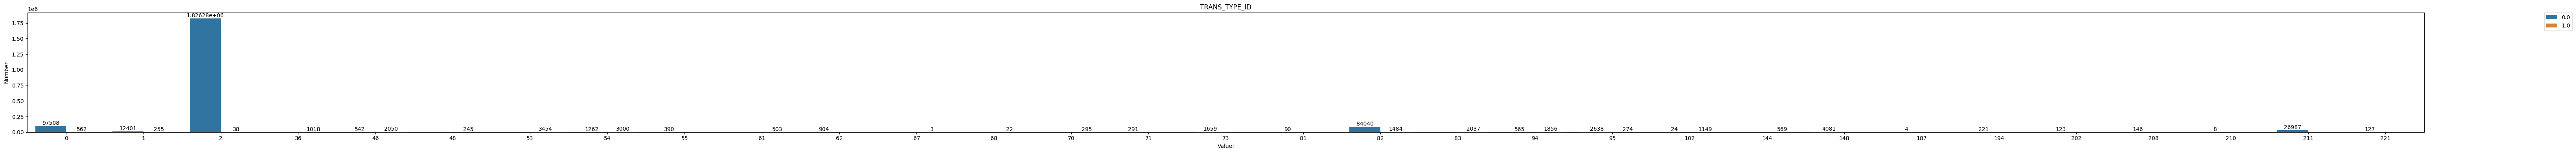

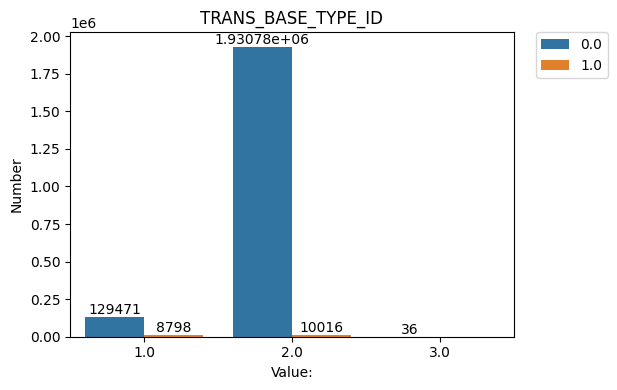

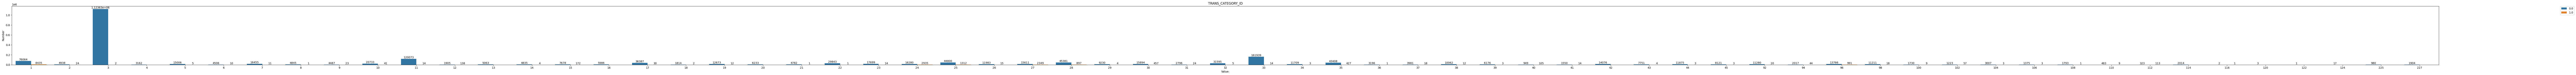

In [22]:
for i in category_cols:
  if i not in data.columns:
    continue
  else:
    ax1 = sns.countplot(x=i, hue='CATEGORY_ID', data=data)
    ax1.set_xlabel('Value:')
    ax1.set_ylabel('Number')
    ax1.set_title(i)
    plt.gcf().set_size_inches(len(data[i].unique()) * 2.1, 4)

    for container in ax1.containers:
      ax1.bar_label(container)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.show()

***Hist plot cho các cols số***

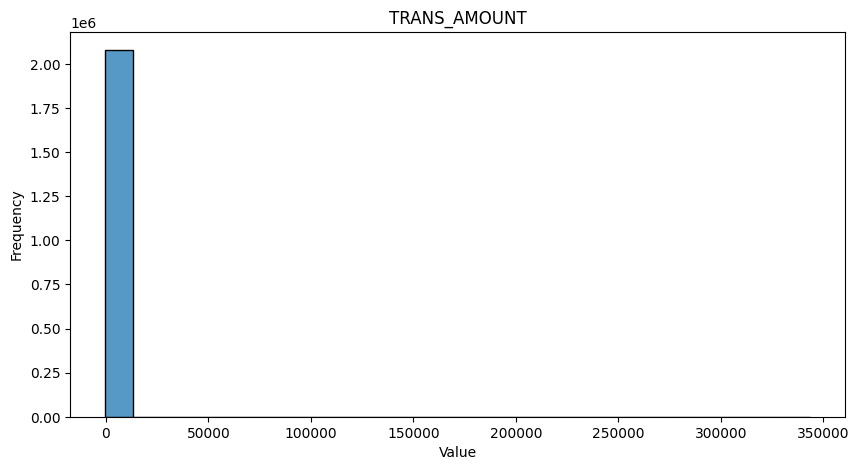

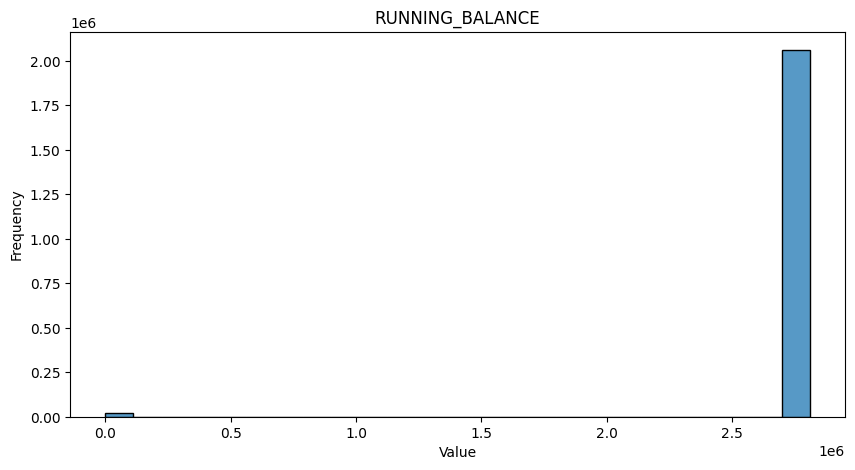

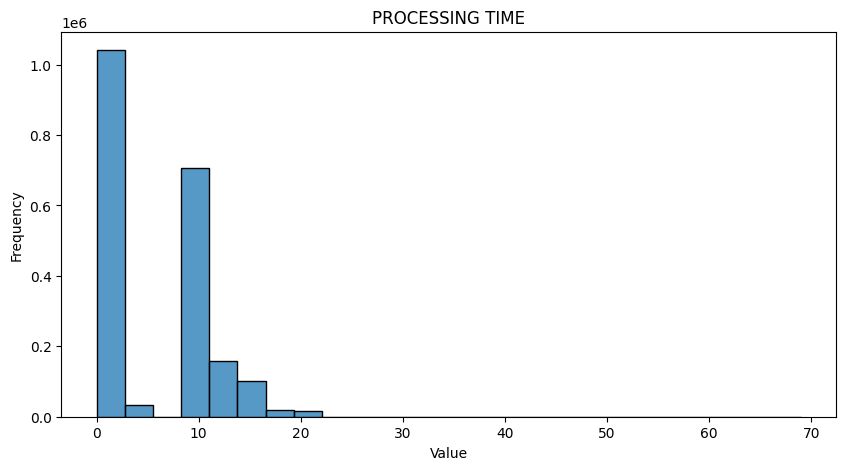

In [23]:
for i in numeric_cols:
  plt.figure(figsize=(10,5))
  ax2 = sns.histplot(data[i], bins=25)
  ax2.set_xlabel('Value')
  ax2.set_ylabel('Frequency')
  ax2.set_title(i)

# **PREDICTION**

In [49]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['CATEGORY_ID'], axis=1)
    y = data['CATEGORY_ID']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Hàm tính Cross Validation
def cross_val(model, X_train, y_train):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())
    print("Standard deviation of CV score:", cv_scores.std())
    return cv_scores, cv_scores.mean(), cv_scores.std()

In [40]:
X_train, X_test, y_train, y_test = preprocess_data(data)

***1.Random Forest***

In [43]:
model_RF = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = 'balanced')
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

cv_scores, cv_mean, cv_std = cross_val(model_RF, X_train, y_train)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1648175
         1.0       1.00      1.00      1.00     15106

    accuracy                           1.00   1663281
   macro avg       1.00      1.00      1.00   1663281
weighted avg       1.00      1.00      1.00   1663281

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    412113
         1.0       1.00      1.00      1.00      3708

    accuracy                           1.00    415821
   macro avg       1.00      1.00      1.00    415821
weighted avg       1.00      1.00      1.00    415821

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0
Standard deviation of CV score: 0.0


***2.XG Boost***

In [95]:
model_XGB = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

cv_scores, cv_mean, cv_std = cross_val(model_XGB, X_train, y_train)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1648175
         1.0       1.00      1.00      1.00     15106

    accuracy                           1.00   1663281
   macro avg       1.00      1.00      1.00   1663281
weighted avg       1.00      1.00      1.00   1663281

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    412113
         1.0       1.00      1.00      1.00      3708

    accuracy                           1.00    415821
   macro avg       1.00      1.00      1.00    415821
weighted avg       1.00      1.00      1.00    415821

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0
Standard deviation of CV score: 0.0


***3.MLP***

In [118]:
model_MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
model_MLP.fit(X_train, y_train)

y_train_pred = model_MLP.predict(X_train)
y_test_pred = model_MLP.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

cv_scores, cv_mean, cv_std = cross_val(model_MLP, X_train, y_train)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1648175
         1.0       1.00      1.00      1.00     15106

    accuracy                           1.00   1663281
   macro avg       1.00      1.00      1.00   1663281
weighted avg       1.00      1.00      1.00   1663281

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    412113
         1.0       1.00      1.00      1.00      3708

    accuracy                           1.00    415821
   macro avg       1.00      1.00      1.00    415821
weighted avg       1.00      1.00      1.00    415821

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0
Standard deviation of CV score: 0.0


# **KIỂM THỬ VỚI TẬP TEST**

***Cần phải kiểm tra lại vì tập test này không nhận diện được nhiều***

In [119]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/Banking Transactions/Banking_transactions.csv')
test

,BANK_TRANS_ID,TRANS_AMOUNT,TRANS_DATE,POST_DATE,CHECK_NUMBER,CATEGORY_ID,CATEGORY,IS_DELETED,BANK_ACCOUNT_ID,TRANS_TYPE_ID,TRANS_BASE_TYPE_ID,TRANS_CATEGORY_ID,DESCRIPTION,RUNNING_BALANCE
0,10000190,333.28,2009-01-03T18:30:00.000+0000,2009-01-03T18:30:00.000+0000,check #62257,0.0,0,0,10000680.0,113,1.0,1,ATM WITHDRAWAL - SAN FRANCISCO IPDN BANK SAN F...,5162.0
1,10000191,333.28,2009-01-03T18:30:00.000+0000,2009-01-03T18:30:00.000+0000,check # 62257,0.0,0,0,10000680.0,113,1.0,1,ATM WITHDRAWAL - SAN FRANCISCO IPDN BANK SAN F...,5162.0
2,10000192,333.28,2009-01-03T18:30:00.000+0000,2009-01-03T18:30:00.000+0000,#62257,0.0,0,0,10000680.0,113,1.0,1,ATM WITHDRAWAL - SAN FRANCISCO IPDN BANK SAN F...,5162.0
3,10000193,1234.00,2009-01-16T18:30:00.000+0000,2009-01-27T18:30:00.000+0000,62096,0.0,0,0,NaN,46,2.0,1,Account Maintenance Fee,5000.0
4,12179866,59.00,2010-08-31T18:30:00.000+0000,NaN,998,0.0,category,0,10216470.0,2,2.0,17,352419TP HSBC LOAN 0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10010271,9846.00,2005-06-15T18:30:00.000+0000,2005-06-15T18:30:00.000+0000,DAG-333,0.0,other,0,10012376.0,1,1.0,9,DESC,NaN
9996,10010714,998.99,2010-02-09T18:30:00.000+0000,2010-02-09T18:30:00.000+0000,62096,1.0,0,0,10012717.0,82,2.0,1,CHECK URDesc_02 CRD PURCHASE 03/10 PACIFIC FML...,5063.0
9997,10010715,1000.00,2010-02-08T18:30:00.000+0000,2010-02-08T18:30:00.000+0000,62096,0.0,0,0,10012717.0,82,2.0,14,PREMATIC URAmountVary_5 CORP INS. PREM 031706 ...,5048.0
9998,10010716,9990.00,2010-02-06T18:30:00.000+0000,2010-02-06T18:30:00.000+0000,62101,1.0,0,0,10012717.0,83,1.0,1,URAmountVary_10 POS PURCHASE - CNS Cingular PO...,5049.0


In [120]:
test = fillna_cols(test)
test = change_time_type(test)

In [121]:
data_cols = data.columns.to_list()
test = test[data_cols]

In [ ]:
test = mapping_columns(test)

In [123]:
test = test.dropna()

In [124]:
test

,TRANS_AMOUNT,CHECK_NUMBER,CATEGORY_ID,CATEGORY,TRANS_TYPE_ID,TRANS_BASE_TYPE_ID,TRANS_CATEGORY_ID,RUNNING_BALANCE,PROCESSING TIME
0,333.28,1,0.0,0.0,113,1.0,1,5162.000000,0.0
1,333.28,1,0.0,0.0,113,1.0,1,5162.000000,0.0
2,333.28,1,0.0,0.0,113,1.0,1,5162.000000,0.0
3,1234.00,1,0.0,0.0,46,2.0,1,5000.000000,11.0
5,59.00,1,0.0,4.0,2,2.0,11,5029.050669,15.0
...,...,...,...,...,...,...,...,...,...
9995,9846.00,1,0.0,4.0,1,1.0,9,5029.050669,0.0
9996,998.99,1,1.0,0.0,82,2.0,1,5063.000000,0.0
9997,1000.00,1,0.0,0.0,82,2.0,14,5048.000000,0.0
9998,9990.00,1,1.0,0.0,83,1.0,1,5049.000000,0.0


***Chia tập test ra làm 2 phần, phần output của test sẽ dùng để so sánh với output gốc***

In [125]:
test_true_values = test['CATEGORY_ID']
check_test = test.drop(columns = ['CATEGORY_ID'])

In [126]:
scaler = MinMaxScaler()
check_test = scaler.fit_transform(check_test)

In [127]:
#Dự đoán cho tập dữ liệu test
test_data_pred = model_MLP.predict(check_test)
test_data_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [128]:
test_data_pred = pd.Series(test_data_pred)
test_data_pred.value_counts()

,count
0.0,6589
1.0,5


In [129]:
test_true_values.value_counts()

,count
CATEGORY_ID,
0.0,5409
1.0,1185


In [130]:
#Đặt lại index cho test_true_values
test_true_values = test_true_values.reset_index(drop=True)

In [131]:
df = pd.DataFrame({'True Values': test_true_values, 'Predicted Values': test_data_pred})
df

,True Values,Predicted Values
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
6589,0.0,0.0
6590,1.0,0.0
6591,0.0,0.0
6592,1.0,0.0


In [132]:
# Đếm số dòng mà True Values và Predicted Values giống nhau
matching_rows_count = (df['True Values'] == df['Predicted Values']).sum()

print(f'Số lượng dòng có giá trị giống nhau: {matching_rows_count}')

Số lượng dòng có giá trị giống nhau: 5404
